# Jupyter Notebook to Analyze ERA5 100m Wind data

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Product type:Reanalysis

Variable:100m u-component of wind, 100m v-component of wind, 10m u-component of wind, 10m v-component of wind

Year:2021, 2022, 2023

Month:January, February, March, April, May, June, July, August, September, October, November, December

Day:01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31

Time:00:00, 01:00, 02:00, 03:00, 04:00, 05:00, 06:00, 07:00, 08:00, 09:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00

Sub-region extraction:North 55°, West 6°, South 47°, East 15°

Format:NetCDF (experimental)

In [4]:
f=xr.open_dataset('C:/Users/Anwender/Documents/GitHub/RiVaPy_development/ERA5_Data_netCDF/adaptor.mars.internal-1698057309.422591-30637-3-8c127153-a2da-4e09-9756-06435d022dfb.nc')

lons = f.variables['longitude'][:]  # longitude
lats = f.variables['latitude'][:]  # latitude
u100 = f.variables['u100'][:,0,:,:] # u-wind at 100m height
v100 = f.variables['v100'][:,0,:,:]  # v-wind at 100m height
u10 = f.variables['u10'][:,0,:,:]  # u-wind at 10m height
v10 = f.variables['v10'][:,0,:,:]  # v-wind at 10m height
time = f.variables['time'][:]

ws100 = np.array(np.sqrt(u100*u100+v100*v100))
ws10 = np.array(np.sqrt(u10*u10+v10*v10))

print(u100)



#f.close()

#print(f['v10'])


<xarray.Variable (time: 24490, latitude: 33, longitude: 37)>
array([[[1.267294, 1.337146, ..., 2.455603, 2.324215],
        [1.298062, 1.528406, ..., 2.21029 , 2.103019],
        ...,
        [1.565827, 1.712182, ..., 3.3038  , 3.255569],
        [1.605742, 1.606573, ..., 3.085099, 3.734552]],

       [[1.249   , 1.119275, ..., 1.916748, 1.825275],
        [1.110128, 1.295568, ..., 1.651478, 1.599921],
        ...,
        [1.470196, 1.942526, ..., 3.566575, 3.448493],
        [1.471028, 1.589942, ..., 3.26139 , 3.934959]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,

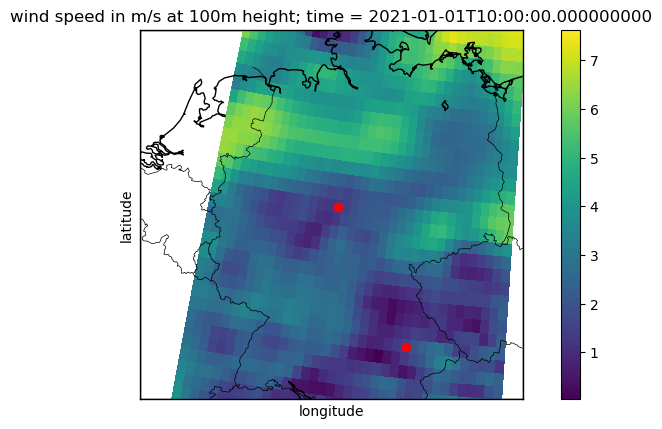

In [5]:
m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

x1,y1 = m(lon[15,15], lat[15,15])
x2,y2 = m(lon[25,25], lat[25,25])


cs = m.pcolor(xi,yi,np.squeeze(ws100[10,:,:]))

m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[10])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.plot(x2, y2,'ro')
plt.show()



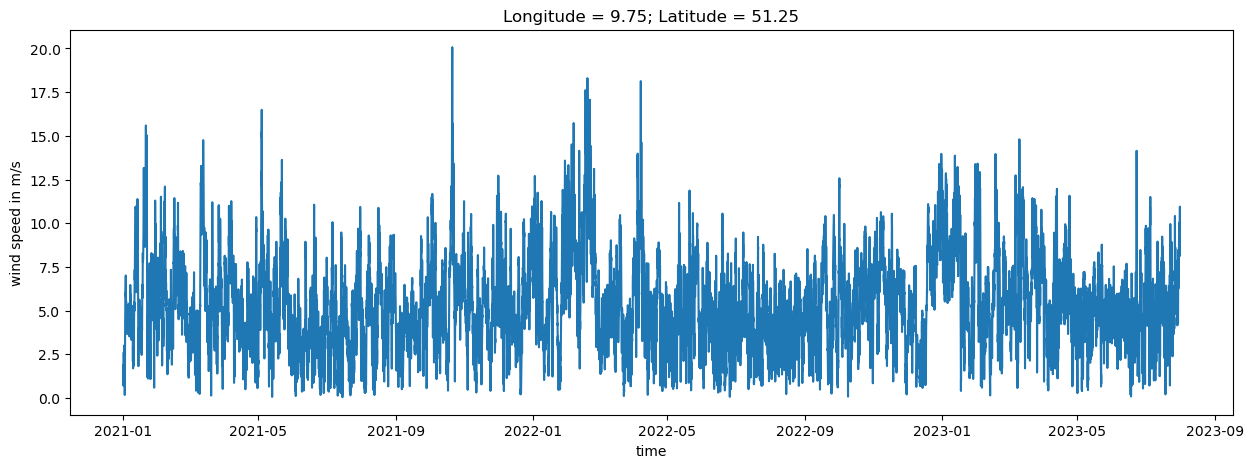

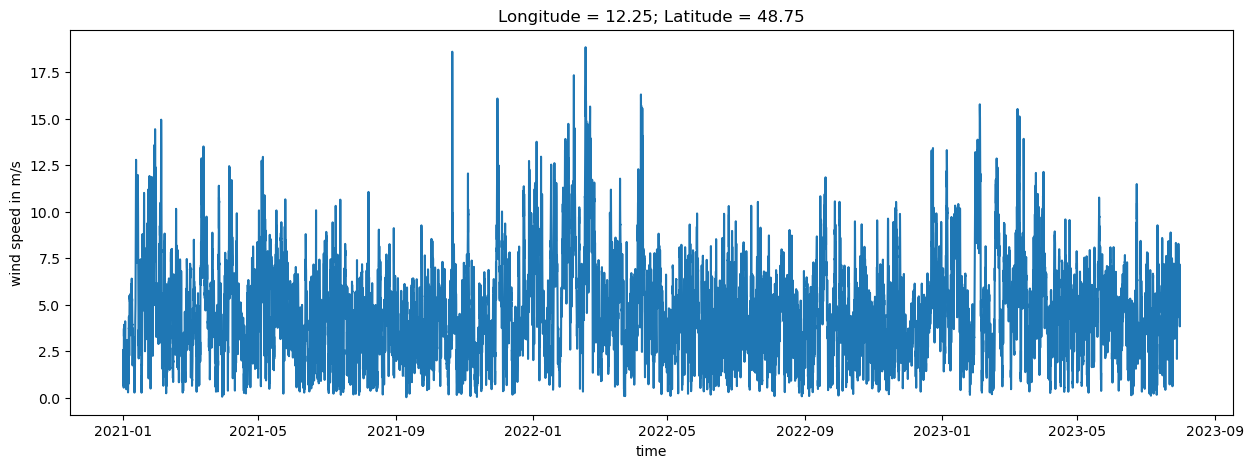

In [6]:
plt.figure(figsize=(15,5))
plt.plot(time[:],ws100[:,15,15])
sel_lon = np.array(lons[15])
sel_lat = np.array(lats[15])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(time[:],ws100[:,25,25])
sel_lon = np.array(lons[25])
sel_lat = np.array(lats[25])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.show()


(2.080294249026404, 0, 5.878695082058485)


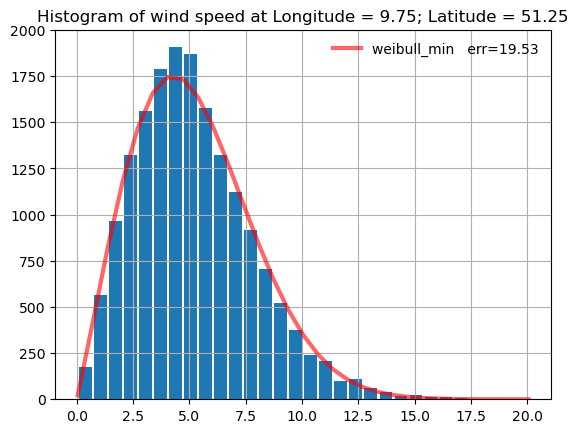

(1.9124403281079496, 0, 5.1871836217174785)


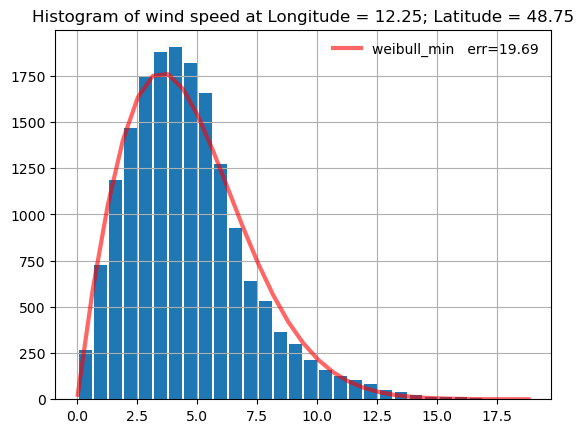

In [7]:
import scipy.stats as s

N=30
x = ws100[0:24*2*365,15,15]
counts, bins = np.histogram(x, bins=N)
bin_width = bins[1]-bins[0]
total_count = float(sum(counts))

f, ax = plt.subplots(1, 1)

ax.bar(bins[:-1]+bin_width/2., counts, align='center', width=.85*bin_width)
ax.grid('on')
def fit_pdf(x, name='weibull_min', color='r'):
    dist = getattr(s, name)  # params = shape, loc, scale
    params = s.weibull_min.fit(x, floc=0)  # 1-day lag minimum for shipping
    print(params)
    y = dist.pdf(bins, *params)*total_count*bin_width
    sqerror_sum = np.log(sum(ci*(yi - ci)**2. for (ci, yi) in zip(counts, y)))
    ax.plot(bins, y, color, lw=3, alpha=0.6, label='%s   err=%3.2f' % (name, sqerror_sum))
    return y

colors = ['r-', 'g-', 'r:', 'g:']

for name, color in zip(['weibull_min'], colors): # 'lognorm', 'erlang', 'chi2', 'weibull_min', 
    y = fit_pdf(x, name=name, color=color)

ax.legend(loc='best', frameon=False)
sel_lon = np.array(lons[15])
sel_lat = np.array(lats[15])
plt.title('Histogram of wind speed at '+'Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.show()


x = ws100[0:24*2*365,25,25]
counts, bins = np.histogram(x, bins=N)
bin_width = bins[1]-bins[0]
total_count = float(sum(counts))

f, ax = plt.subplots(1, 1)

ax.bar(bins[:-1]+bin_width/2., counts, align='center', width=.85*bin_width)
ax.grid('on')
def fit_pdf(x, name='weibull_min', color='r'):
    dist = getattr(s, name)  # params = shape, loc, scale
    params = s.weibull_min.fit(x, floc=0)  # 1-day lag minimum for shipping
    print(params)
    y = dist.pdf(bins, *params)*total_count*bin_width
    sqerror_sum = np.log(sum(ci*(yi - ci)**2. for (ci, yi) in zip(counts, y)))
    ax.plot(bins, y, color, lw=3, alpha=0.6, label='%s   err=%3.2f' % (name, sqerror_sum))
    return y

colors = ['r-', 'g-', 'r:', 'g:']

for name, color in zip(['weibull_min'], colors): # 'lognorm', 'erlang', 'chi2', 'weibull_min', 
    y = fit_pdf(x, name=name, color=color)

ax.legend(loc='best', frameon=False)
sel_lon = np.array(lons[25])
sel_lat = np.array(lats[25])
plt.title('Histogram of wind speed at '+'Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.show()



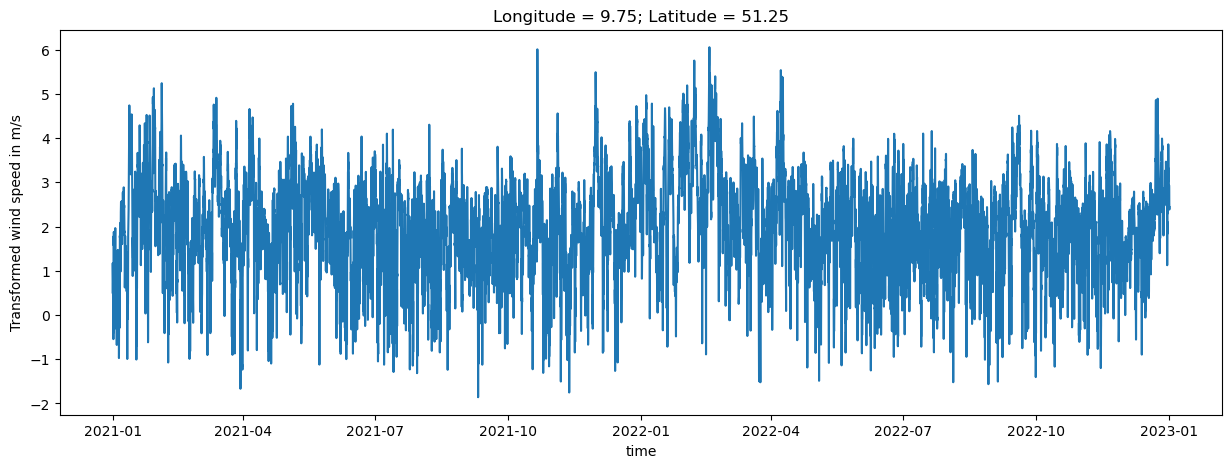

[2.247440189281568, 2.214679058683354, 2.1898256404356027, 2.1589595020872596, 2.103190669296143, 2.064304992668995, 1.999216394705905, 1.8855406959708498, 1.804430346580833, 1.7535859688136608, 1.7202557923876844, 1.7457486603655616, 1.7717933049795969, 1.8055199950994778, 1.8427237431238954, 1.8684328111956618, 1.924540205249264, 1.9902415664352997, 2.0645647051147553, 2.1598138684031283, 2.2251544730541064, 2.2409179431318584, 2.266175856224845, 2.2640389321149623]


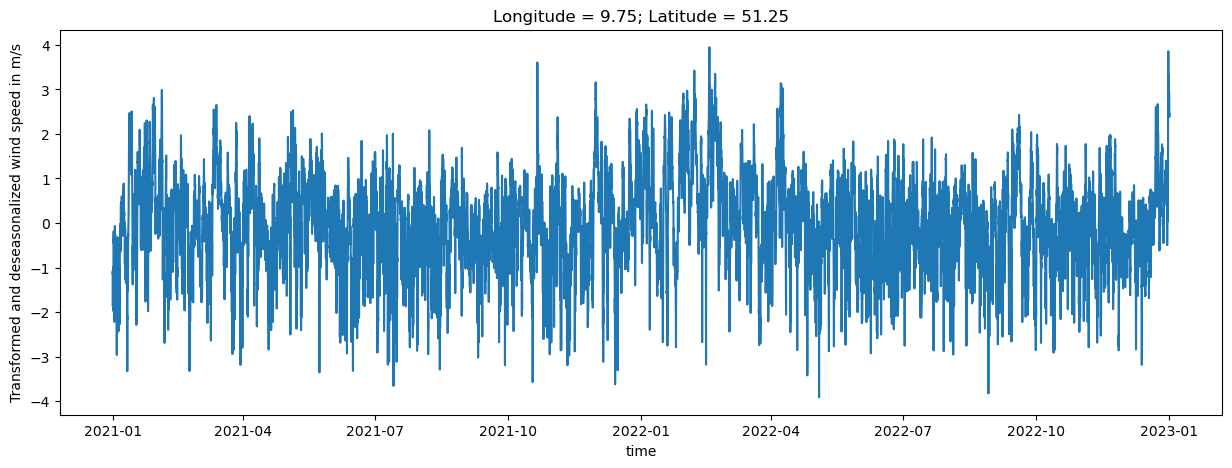

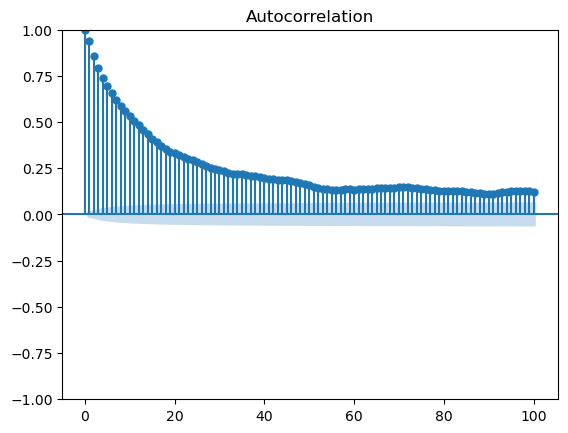

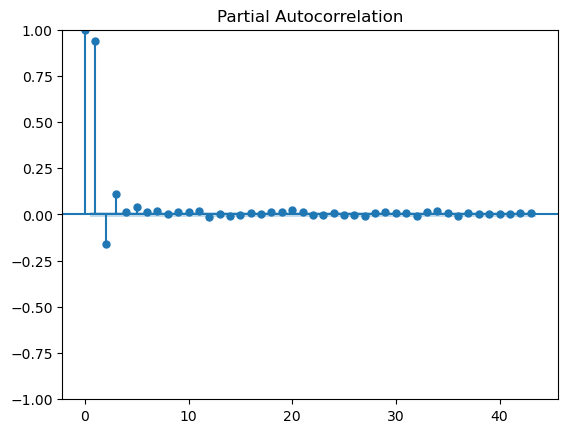

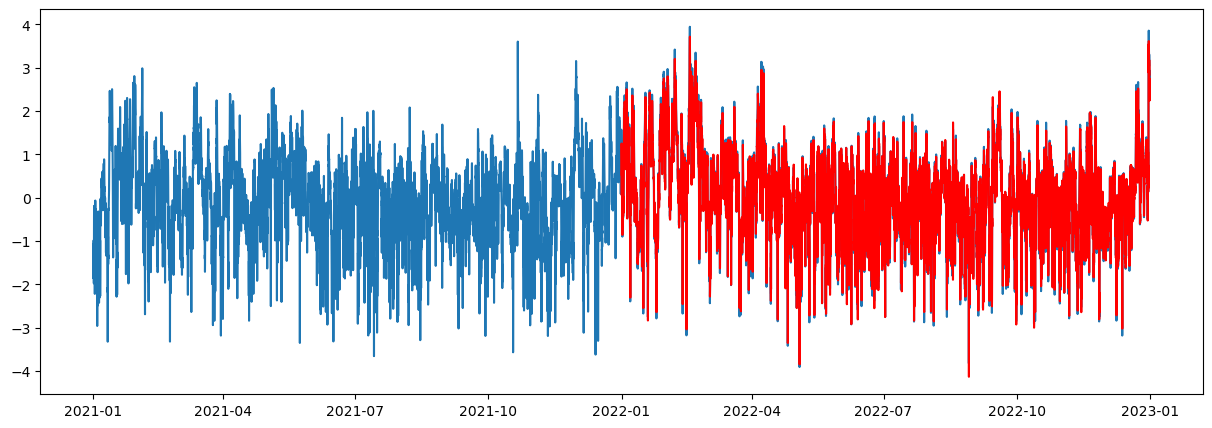

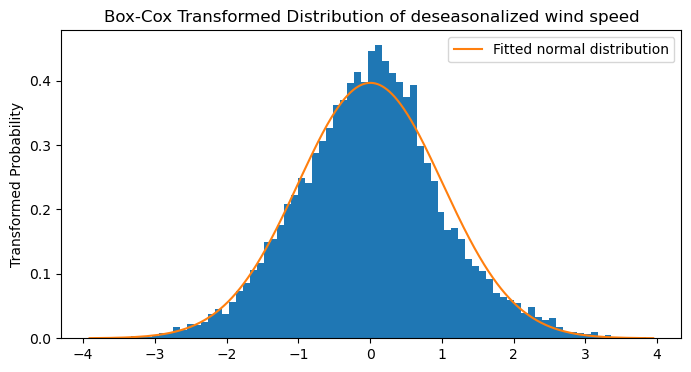

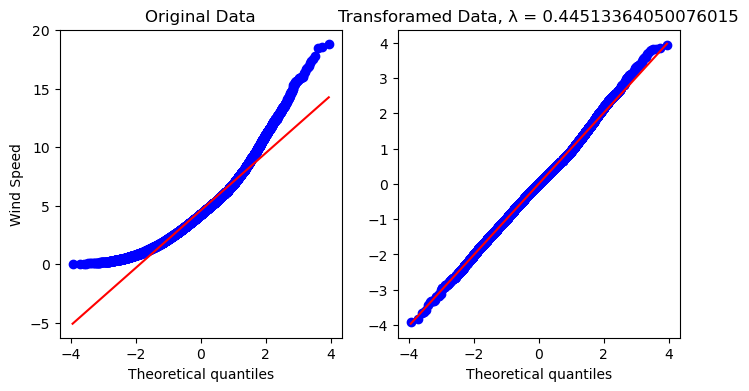

In [8]:
#box cox transformation
x_trans, lmbda = s.boxcox(x)

xt = x_trans

plt.figure(figsize=(15,5))
plt.plot(time[0:2*24*365],xt)
sel_lon = np.array(lons[15])
sel_lat = np.array(lats[15])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('Transformed wind speed in m/s')
plt.xlabel('time')
plt.show()

mu = []
for i in range(0,24):
    mu.append(0)
    count = 0
    for j in range(i,len(xt)-24,24):
        mu[i] = mu[i] + xt[j]
        count = count + 1

    mu[i] = mu[i]/count

print(mu)

sigma = []
for i in range(0,24):
    sigma.append(0)
    count = 0
    for j in range(i,len(xt)-24,24):
        sigma[i] = sigma[i] + (xt[j] - mu[i])**2
        count = count + 1

    sigma[i] = np.sqrt(sigma[i]/count)

for i in range(0,24):
    for j in range(i,len(xt)-24,24):
        xt[j] = (xt[j] - mu[i])/sigma[i]

plt.figure(figsize=(15,5))
plt.plot(time[0:2*24*365],xt)
sel_lon = np.array(lons[15])
sel_lat = np.array(lats[15])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('Transformed and deseasonalized wind speed in m/s')
plt.xlabel('time')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
#The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter.
plot_acf(xt,lags = 100)
#One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF)
plot_pacf(xt)

model = ARIMA(xt[24*365:2*24*365], order=(3, 0, 0))  
results_AR = model.fit()# If disp < 0 convergence information will not be printed
plt.figure(figsize=(15,5))
plt.plot(time[0:2*24*365],xt)
plt.plot(time[24*365:2*24*365],results_AR.fittedvalues, color='red')

xt.sort()
mean, std = s.norm.fit(xt, loc=0)
pdf_norm = s.norm.pdf(xt, mean, std)

# visual inspection

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(xt, bins='auto', density=True)
ax.plot(xt, pdf_norm, label='Fitted normal distribution')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of deseasonalized wind speed')
ax.legend();


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

prob = s.probplot(x, dist=s.norm, plot=ax1)
prob = s.probplot(xt, dist=s.norm, plot=ax2)

ax1.set_title('Original Data')
ax1.set_ylabel('Wind Speed')
ax2.set_title('Transforamed Data, λ = %s' % lmbda);
ax2.set_ylabel('');